In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

for i in np.arange(len(boston)):
    print(list(boston.keys())[i])

data = np.c_[boston['data'], boston['target']]
columns = np.append(boston['feature_names'], 'MEDV')

df= pd.DataFrame(data, columns= columns)
df.head()

data
target
feature_names
DESCR
filename
data_module


c:\Users\BIDA19-025\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#Looking for null values
null_values = (df.isnull().sum()/len(df))*100
null_values = pd.DataFrame(null_values, columns=['% of Null Values'])
null_values

,% of Null Values
CRIM,0.0
ZN,0.0
INDUS,0.0
CHAS,0.0
NOX,0.0
RM,0.0
AGE,0.0
DIS,0.0
RAD,0.0
TAX,0.0


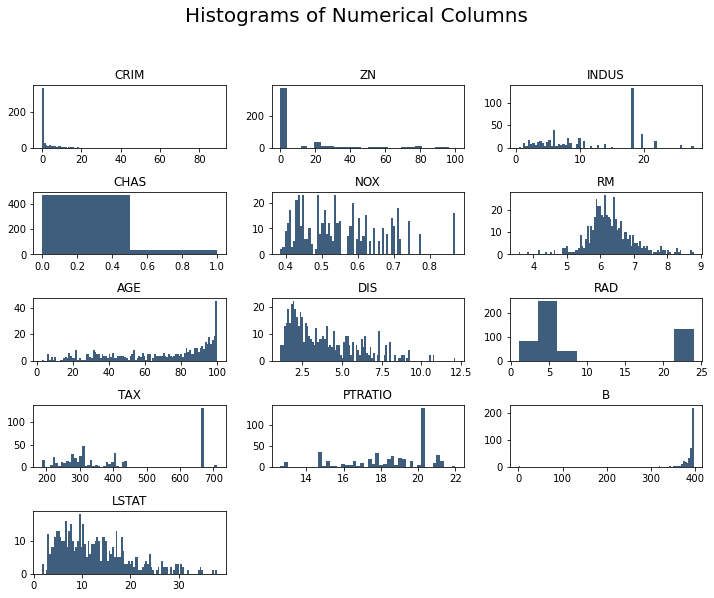

In [4]:
# Histograms
df2 = df.loc[:,boston['feature_names']]

fig = plt.figure(figsize=(10, 10))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation with MEDV'}>

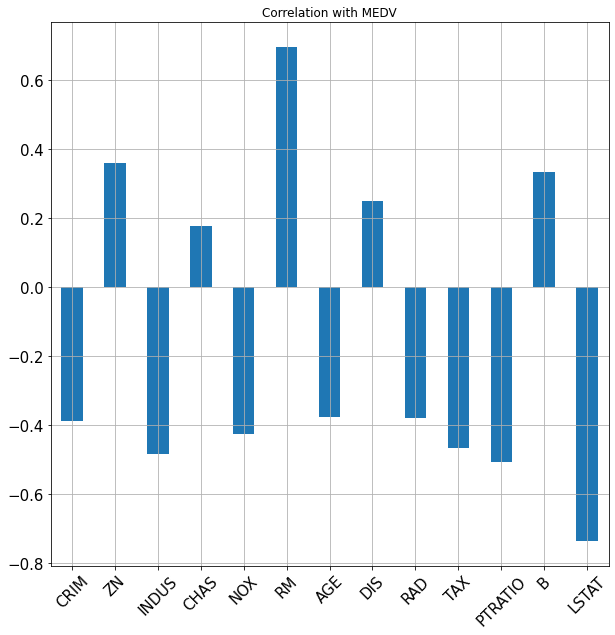

In [5]:
## Correlation with independent Variable (Note: Models like RF are not linear like these)
df.columns
df2.corrwith(df['MEDV']).plot.bar(
        figsize = (10, 10), title = "Correlation with MEDV", fontsize = 15,
        rot = 45, grid = True)

In [6]:
#Define X and y
X = df.loc[:,boston['feature_names']]
y = df.loc[:,'MEDV']

In [7]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [8]:
## Multiple Linear Regression Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [9]:
## Polynomial Regressor
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting Test Set
y_pred = regressor.predict(poly_reg.fit_transform(X_test))
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Polynomial Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [10]:
## Suport Vector Regression 
'Necessary Standard Scaler '
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Support Vector RBF', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [11]:
## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [12]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train,y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [14]:
#The best model
results.sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest Regression,2.633542,18.003805,4.243089,0.778900
1,Polynomial Regression,3.342739,25.215798,5.021533,0.690332
3,Decision Tree Regression,3.510784,32.416373,5.693538,0.601904
0,Multiple Linear Regression,3.842909,33.448980,5.783509,0.589222
2,Support Vector RBF,5.302741,78.478054,8.858784,0.036233
